<a href="https://colab.research.google.com/github/Pataweepr/ComEngMath2/blob/master/(ComEngMath2)FFT_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 link : https://drive.google.com/file/d/1xiENysswSmAenUvMfdgdgRkckZPLYH2H/view?usp=sharing

In [1]:
# !pip install soundfile

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
!unzip '/content/gdrive/My Drive/ComEngMath2_data.zip'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
Archive:  /content/gdrive/My Drive/ComEngMath2_data.zip
replace ComEngMath2_data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ComEngMath2_data/.DS_Store  
  inflating: __MACOSX/ComEngMath2_data/._.DS_Store  
  inflating: ComEngMath2_data/ComEngMath2_figure/.DS_Store  
  inflating: __MACOSX/ComEngMath2_data/ComEngMath2_figure/._.DS_Store  
  inflating: ComEngMath2_data/ComEngMath2_figure/Screen Shot 2563-07-19 at 20.46.06.png  
  inflating: __MACOSX/ComEngMath2_data/ComEngMath2_figure/._Screen Shot 2563-07-19 at 20.46.06.png  
  inflating: ComEngMath2_data/ComEngMath2_sound/.DS_Store  
  inflating: __MACOSX/ComEngMath2_data/ComEngMath2_sound/._.DS_Store  
  inflating: ComEngMath2_data/ComEngMath2_sound/collect_song/.DS_Store  
  inflating: __MACOSX/ComEngMath2_data/ComEngMath2_sound/collect_song/._.DS_Store  
  inflating: ComEngMath2_dat

# FFT in signal 1 dimension

In [ ]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import matplotlib.pyplot as plt
import IPython.display as ipd
from skimage.io import imread
import os,sys

## create random freq and signal

In [35]:
sampling_rate = 32000

N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq

# random period 
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts

# fs in sampling rate = 32000
fs_real = fs*sampling_rate

# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

# create clean signal
h= np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

# signal with noise
h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700

In [36]:
print(fs)
print(fs_real)

[0.00075465 0.00065304 0.00078031]
[24.14874151 20.89713369 24.97002828]


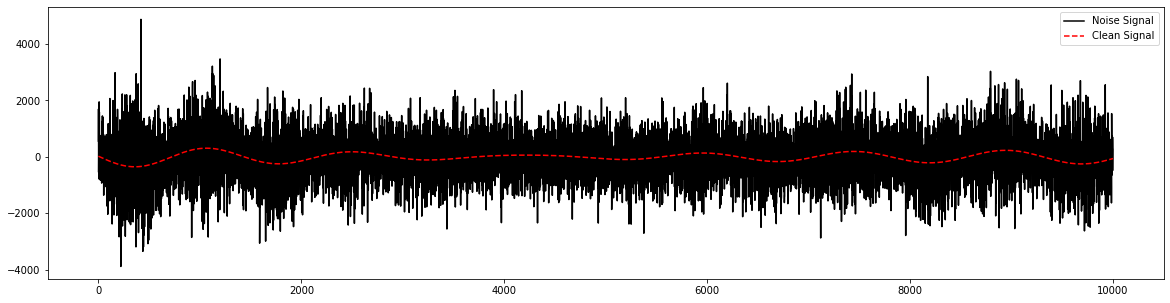

In [37]:
plt.figure(figsize=(20, 5))
plt.plot(t,h_w_noise,'k',label='Noise Signal')
plt.plot(t,h,'r--',label='Clean Signal')
plt.legend(loc='upper right')
plt.show()

In [38]:
Hn = np.fft.fft(h_w_noise)
Hn

array([-263645.47358897-1.81898940e-11j, -164996.5036403 -1.84699252e+04j,
       -125973.98241248+6.94200436e+04j, ...,
       -176269.64950156+2.17818463e+04j, -125973.98241248-6.94200436e+04j,
       -164996.5036403 +1.84699252e+04j])

## see all freq in sampling rate

In [39]:
freq = np.fft.fftfreq(N,d=1/sampling_rate)
print(freq)
print(len(freq))

[ 0.          3.19968003  6.39936006 ... -9.5990401  -6.39936006
 -3.19968003]
10001


## sprint pos/neg freq in all freq

In [40]:
ind_freq = np.arange(1,N//2+1)
freq_pos =  freq[ind_freq]
print(freq_pos)
freq_neg = freq[-ind_freq]
print(freq_neg)

[3.19968003e+00 6.39936006e+00 9.59904010e+00 ... 1.59920008e+04
 1.59952005e+04 1.59984002e+04]
[-3.19968003e+00 -6.39936006e+00 -9.59904010e+00 ... -1.59920008e+04
 -1.59952005e+04 -1.59984002e+04]


## see power spectrum 

In [41]:
psd =  np.abs(Hn[ind_freq])**2 + np.abs(Hn[-ind_freq])**2 # power spec density 
print(psd)

[5.51299687e+10 4.13771734e+10 6.30908763e+10 ... 1.73161165e+09
 2.80622427e+07 3.09706115e+09]


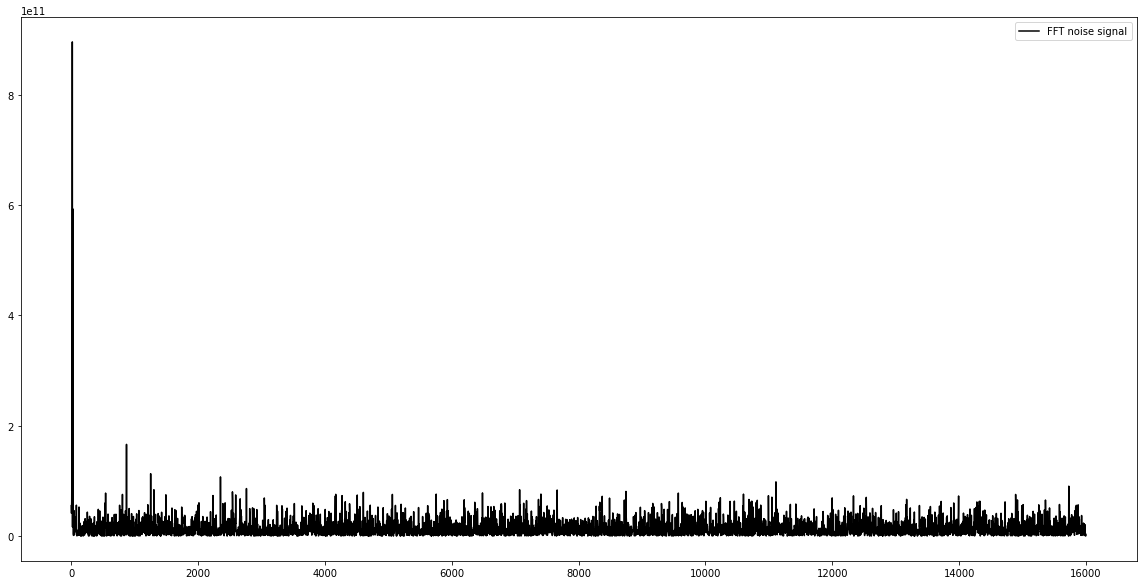

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(freq[ind_freq],psd,'k-',label='FFT noise signal')
plt.legend(loc='upper right')
plt.show()

## Zoom data

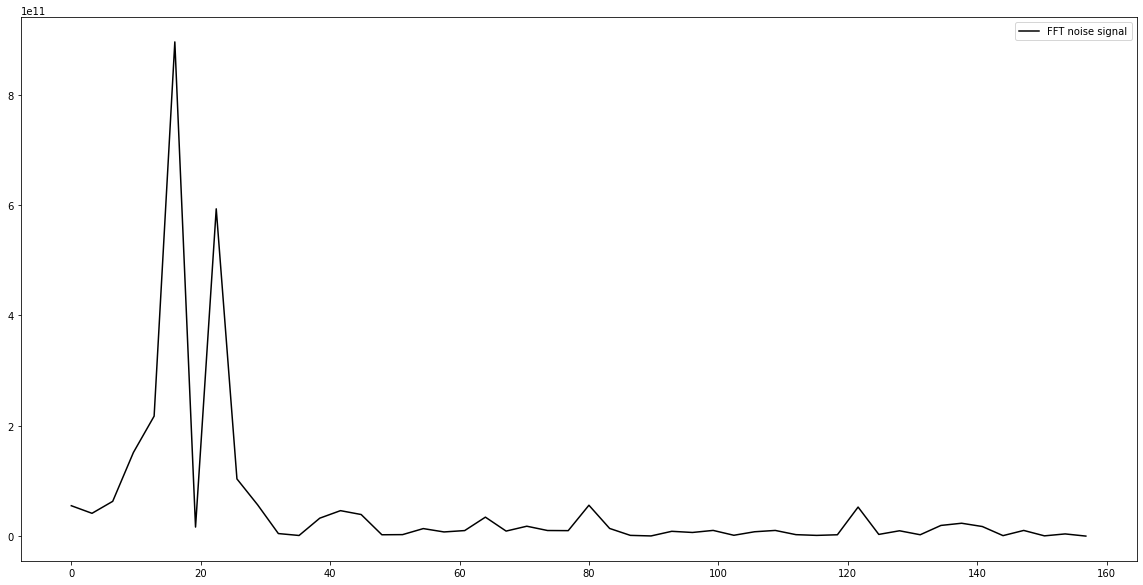

In [43]:
zoom_ind = 50
plt.figure(figsize=(20, 10))
plt.plot(freq[:zoom_ind],psd[:zoom_ind],'k-',label='FFT noise signal')
plt.legend(loc='upper right')
plt.show()

## select freq only high power

In [44]:
idx_sel = np.where(psd>0.4e12)
idx_sel

(array([5, 7]),)

In [45]:
Hn_cut = np.zeros_like(Hn)
Hn_cut[ind_freq[idx_sel]] = Hn[ind_freq[idx_sel]]
Hn_cut[-ind_freq[idx_sel]] = Hn[-ind_freq[idx_sel]]

## see result

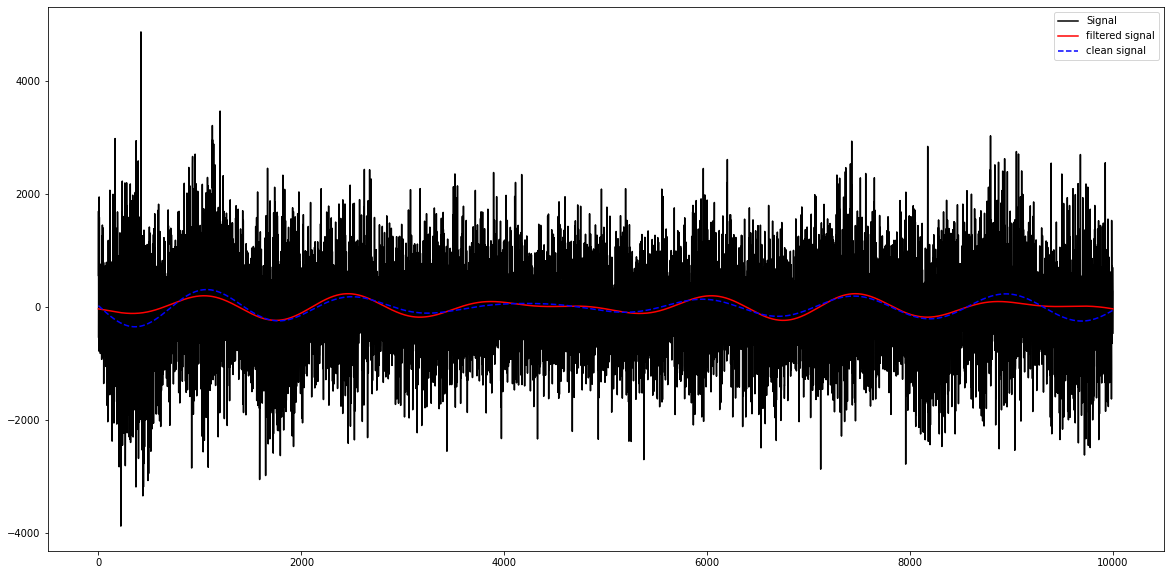

In [46]:
plt.figure(figsize=(20, 10))
plt.plot(t,h_w_noise,'k',label='Signal')
plt.plot(t,np.fft.ifft(Hn_cut).real,'r-',label='filtered signal')
plt.plot(t,h,'b--',label='clean signal')
plt.legend(loc='upper right')
plt.show()

## Test with listeing audio

In [47]:
ipd.Audio(h, rate=sampling_rate)

In [48]:
ipd.Audio(h_w_noise, rate=sampling_rate)

In [49]:
ipd.Audio(np.fft.ifft(Hn_cut).real, rate=sampling_rate)

## result

In [50]:
print(fs)
print('-------------')
print(fs_real)
print(freq_pos[idx_sel])

[0.00075465 0.00065304 0.00078031]
-------------
[24.14874151 20.89713369 24.97002828]
[19.19808019 25.59744026]


## IF we use gussian filter 

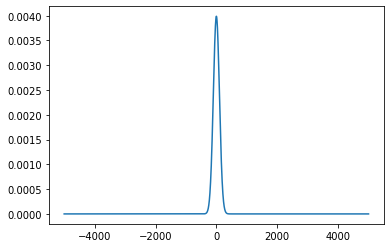

In [51]:
# conv with gussian
sigma = 100.
tt = np.arange(-N//2,N//2)
g = np.exp(-tt**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma
plt.plot(tt,g)

## we have problem in FFT (becuase we have to space to same range)

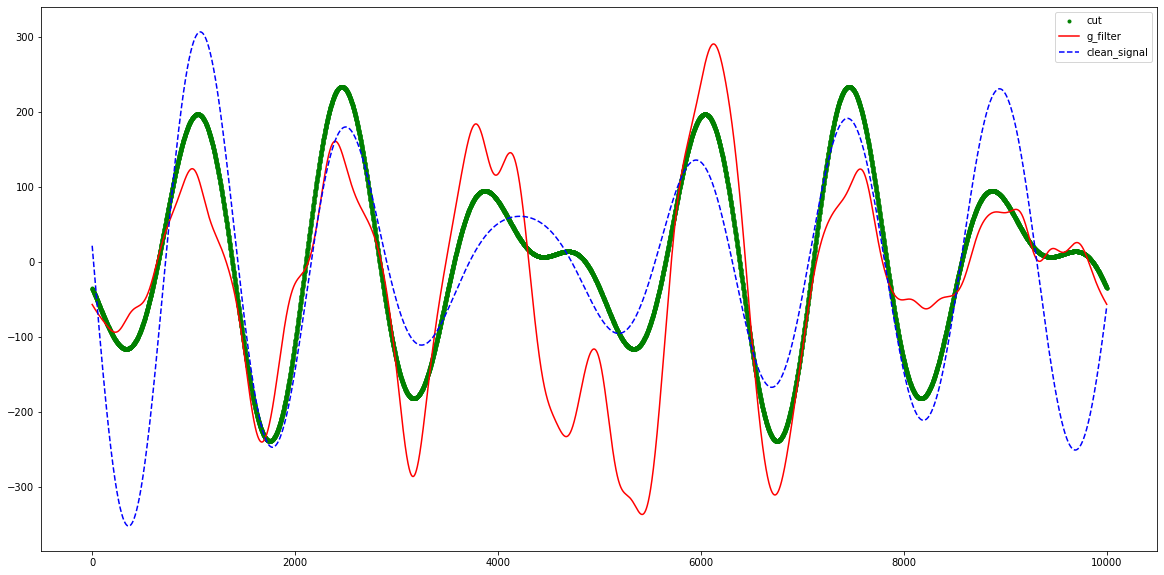

In [52]:
G = np.fft.fft(g)
HG = Hn*G 

plt.figure(figsize=(20, 10))
# plt.plot(t,h_w_noise,'k',label='Signal')
plt.plot(t,np.fft.ifft(Hn_cut).real,'g.',label='cut')
plt.plot(t,np.fft.ifft(HG).real,'r-',label='g_filter')
plt.plot(t,h,'b--',label='clean_signal')
plt.legend(loc='upper right')
plt.show()

In [53]:
# len(h)

In [71]:
# hn_smooth2 = np.convolve(h_w_noise,g)

# plt.figure(figsize=(20, 10))
# plt.plot(t,hn_smooth2[N//2:3*N//2],'g-.',label='g_filter1')
# plt.plot(t,np.fft.ifft(HG).real,'r-',label='g_filter2')
# plt.plot(t,h,'b--',label='clean_signal')
# plt.legend(loc='upper right')
# plt.show()

## add space and see conv-FFT

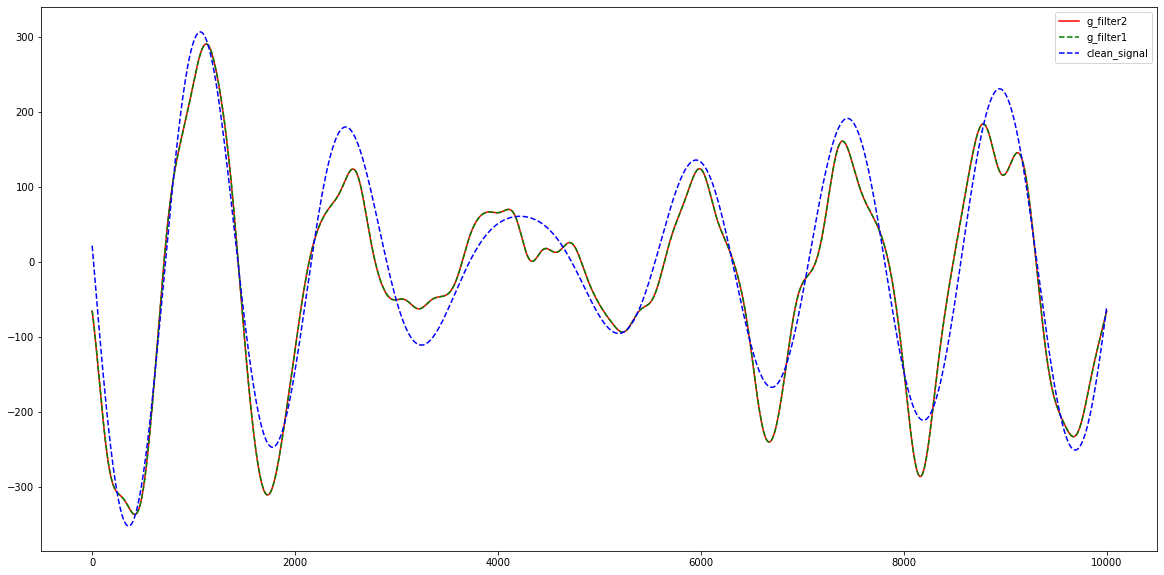

In [55]:
hz = np.zeros(2*N)
hz[N:2*N] = h_w_noise
Hz = np.fft.fft(hz)
tt = np.arange(-N,N)
g = np.exp(-tt**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma
G = np.fft.fft(g)
HzG = Hz*G 
hz_new = np.fft.ifft(HzG)


plt.figure(figsize=(20, 10))
plt.plot(t,hz_new[:N].real,'r-',label='g_filter2')
plt.plot(t,hn_smooth2[N//2:3*N//2].real,'g--',label='g_filter1')
plt.plot(t,h,'b--',label='clean_signal')
plt.legend(loc='upper right')
plt.show()

# TODO : explain D2A converter

Ans:

# TODO : explain alising problem from hw 1

Ans :

---

# FFT in Image

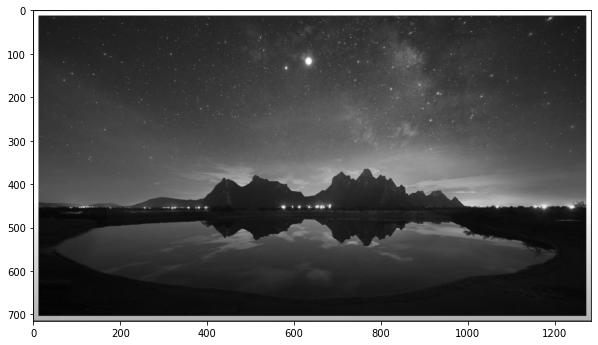

In [65]:
image_path = os.path.join('ComEngMath2_data','ComEngMath2_figure','Screen Shot 2563-07-19 at 20.46.06.png')

im = np.mean(imread(image_path), axis=2)
plt.figure(figsize=(10, 10))
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

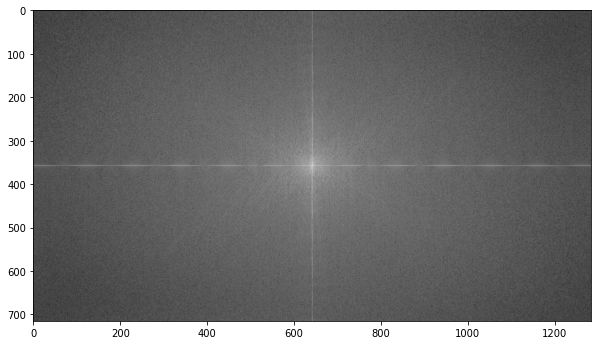

In [66]:
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

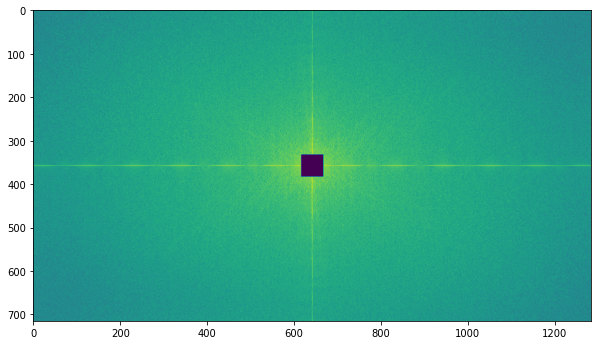

In [67]:
# F1
(w, h) = im.shape
half_w, half_h = int(w/2), int(h/2)

# high pass filter
n = 25
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int))
plt.show()

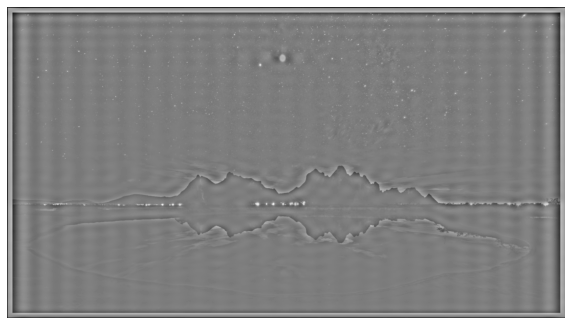

In [68]:
im1 = fftpack.ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

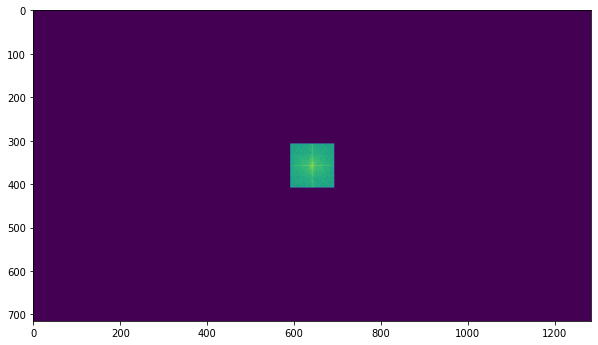

In [69]:
# F1 = fftpack.fft2((im).astype(float))
F2_2 = fftpack.fftshift(F1) # FFT center zeros freq
F2_new = np.zeros_like(F2_2)

# high pass filter
n = 50
F2_new[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = F2_2[half_w-n:half_w+n+1,half_h-n:half_h+n+1]

# select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2_new))).astype(int))
plt.show()

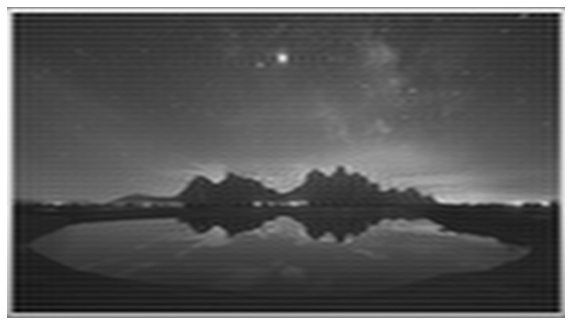

In [70]:
im2 = fftpack.ifft2(fftpack.ifftshift(F2_new)).real
plt.figure(figsize=(10,10))
plt.imshow(im2, cmap='gray')
plt.axis('off')
plt.show()